# **Model Evaluation Notebook**

This notebook handles:


 1. Scaling features
 2. Training several models
 3. Comparing models
 4. Saving the best model

# Load the data

In [3]:
import pandas as pd
from Model_Training import fit_classifiers, evaluate_classifiers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [4]:
X_train = pd.read_csv("../data/splitted_data_encoded/X_train.csv")
X_test = pd.read_csv("../data/splitted_data_encoded/X_test.csv")
y_train = pd.read_csv("../data/splitted_data_encoded/y_train.csv")['Reinfection']
y_test = pd.read_csv("../data/splitted_data_encoded/y_test.csv")['Reinfection']

# Scale the data and train the models

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train models
fitted_models = fit_classifiers(X_train_scaled, y_train)

# Evaluate models
evaluation_df = evaluate_classifiers(fitted_models, X_test_scaled, y_test)

# Show results
print("\n Final Comparison:\n")
print(evaluation_df)


Training Logistic Regression...
 Done in 0.00s

Training Decision Tree...
 Done in 0.02s

Training Random Forest...
 Done in 0.38s

Training SVM...
 Done in 2.35s

Training KNN...
 Done in 0.00s

Training Gradient Boosting...
 Done in 0.41s

Training XGBoost...
 Done in 0.96s


📊 Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.91      0.59      0.71       543
           1       0.10      0.46      0.17        57

    accuracy                           0.57       600
   macro avg       0.51      0.52      0.44       600
weighted avg       0.83      0.58      0.66       600

Confusion Matrix:
 [[319 224]
 [ 31  26]]

📊 Evaluating Decision Tree...
              precision    recall  f1-score   support

           0       0.90      0.79      0.85       543
           1       0.09      0.19      0.12        57

    accuracy                           0.74       600
   macro avg       0.50      0.49      0.48       600
weighted avg 

# Visualize the comparison between models

C:\Users\noura\AppData\Local\Temp\ipykernel_36156\1449460907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=evaluation_df.reset_index(), x="Model", y=metric, palette="viridis")


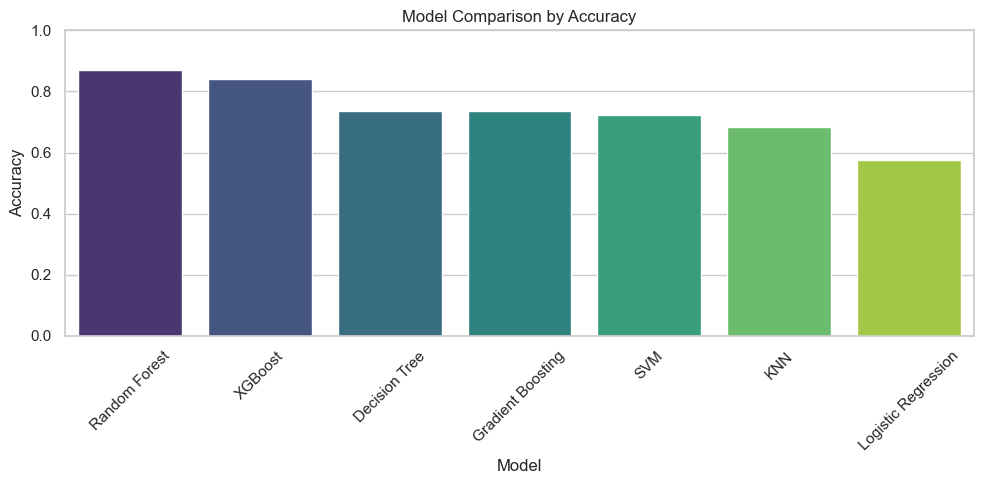

C:\Users\noura\AppData\Local\Temp\ipykernel_36156\1449460907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=evaluation_df.reset_index(), x="Model", y=metric, palette="viridis")


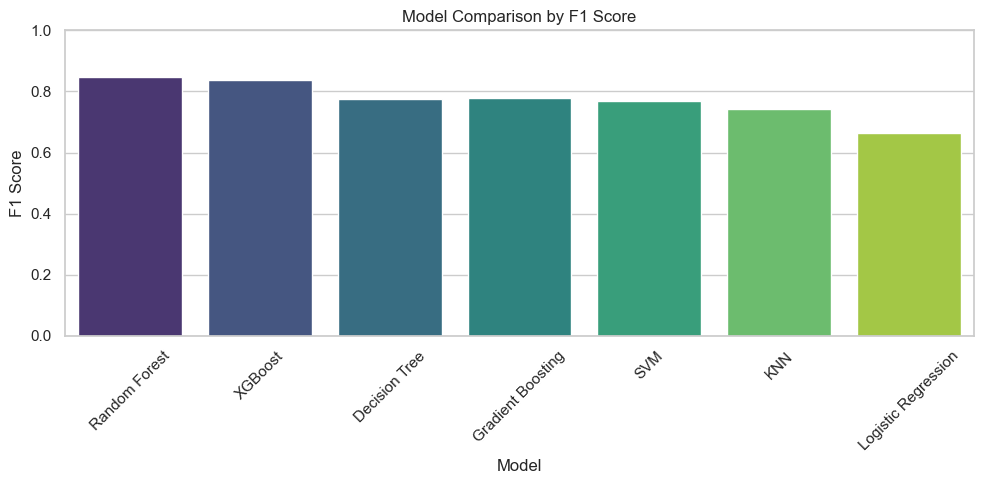

C:\Users\noura\AppData\Local\Temp\ipykernel_36156\1449460907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=evaluation_df.reset_index(), x="Model", y=metric, palette="viridis")


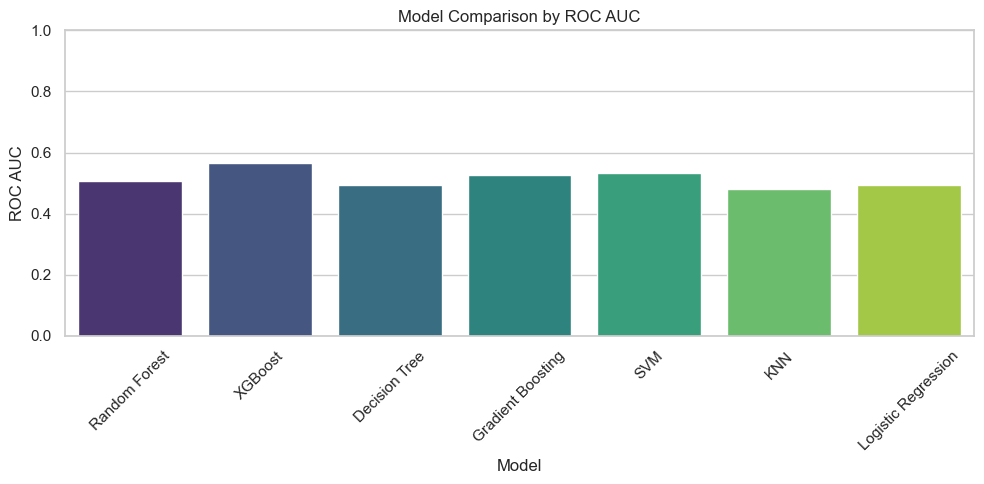

In [9]:
# Set style
sns.set(style="whitegrid")

# Plot multiple metrics
metrics_to_plot = ["Accuracy", "F1 Score", "ROC AUC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=evaluation_df.reset_index(), x="Model", y=metric, palette="viridis")
    plt.title(f"Model Comparison by {metric}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


# Save the best model

In [11]:
# Save the best performing model
joblib.dump(fitted_models["Random Forest"], "../models/best_model.pkl")

['../models/best_model.pkl']